# Impact of Sales Area on Vehicle's Age, Type, and Price

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 200)

## read in the data

In [3]:
df=pd.read_csv('used_cars_data.csv', low_memory=False)


data types of the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

## Data Cleaning & Data Wrangling

In [5]:
df.isna().sum()

vin                              0
back_legroom                159269
bed                        2980472
bed_height                 2570942
bed_length                 2570942
body_type                    13543
cabin                      2936507
city                             0
city_fuel_economy           491285
combine_fuel_economy       3000040
daysonmarket                     0
dealer_zip                       0
description                  77901
engine_cylinders            100581
engine_displacement         172386
engine_type                 100581
exterior_color                  26
fleet                      1426595
frame_damaged              1426595
franchise_dealer                 0
franchise_make              572635
front_legroom               159269
fuel_tank_volume            159269
fuel_type                    82724
has_accidents              1426595
height                      159269
highway_fuel_economy        491285
horsepower                  172386
interior_color      

In [6]:
df.isna().mean()

vin                        0.000000
back_legroom               0.053089
bed                        0.993477
bed_height                 0.856969
bed_length                 0.856969
body_type                  0.004514
cabin                      0.978823
city                       0.000000
city_fuel_economy          0.163759
combine_fuel_economy       1.000000
daysonmarket               0.000000
dealer_zip                 0.000000
description                0.025967
engine_cylinders           0.033527
engine_displacement        0.057461
engine_type                0.033527
exterior_color             0.000009
fleet                      0.475525
frame_damaged              0.475525
franchise_dealer           0.000000
franchise_make             0.190876
front_legroom              0.053089
fuel_tank_volume           0.053089
fuel_type                  0.027574
has_accidents              0.475525
height                     0.053089
highway_fuel_economy       0.163759
horsepower                 0

In [7]:
df.isna().mean()>0.25

vin                        False
back_legroom               False
bed                         True
bed_height                  True
bed_length                  True
body_type                  False
cabin                       True
city                       False
city_fuel_economy          False
combine_fuel_economy        True
daysonmarket               False
dealer_zip                 False
description                False
engine_cylinders           False
engine_displacement        False
engine_type                False
exterior_color             False
fleet                       True
frame_damaged               True
franchise_dealer           False
franchise_make             False
front_legroom              False
fuel_tank_volume           False
fuel_type                  False
has_accidents               True
height                     False
highway_fuel_economy       False
horsepower                 False
interior_color             False
isCab                       True
is_certifi

summary statistics of the data

In [8]:
df.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2.508755e+06,0.0,3.000040e+06,2.827654e+06,2.508755e+06,2.827654e+06,0.0,3.000040e+06,3.000040e+06,3.000040e+06,2.855653e+06,1.483027e+06,3.000040e+06,3.000040e+06,2.959168e+06,2.999944e+06,0.0,3.000040e+06
mean,2.269325e+01,NaN,7.605973e+01,2.968488e+03,2.947337e+01,2.479957e+02,NaN,3.698414e+01,2.754987e+08,-9.064224e+01,3.114690e+04,1.532644e+00,2.993337e+04,5.509768e+02,4.270413e+00,2.335224e+05,NaN,2.017728e+03
std,8.807024e+00,NaN,1.088839e+02,1.348905e+03,7.769252e+00,9.046639e+01,NaN,4.996819e+00,8.894123e+06,1.390589e+01,7.458675e+04,9.202928e-01,1.956617e+04,1.079448e+03,5.133017e-01,1.323221e+05,NaN,4.178701e+00
min,7.000000e+00,NaN,0.000000e+00,7.000000e+02,1.000000e+01,5.500000e+01,NaN,1.834670e+01,1.994620e+07,-1.579280e+02,0.000000e+00,1.000000e+00,1.650000e+02,0.000000e+00,1.000000e+00,4.159300e+04,NaN,1.915000e+03
25%,1.800000e+01,NaN,1.400000e+01,2.000000e+03,2.500000e+01,1.750000e+02,NaN,3.350920e+01,2.745794e+08,-9.708820e+01,6.000000e+00,1.000000e+00,1.845100e+04,0.000000e+00,4.000000e+00,6.337500e+04,NaN,2.017000e+03
50%,2.100000e+01,NaN,3.500000e+01,2.500000e+03,2.900000e+01,2.440000e+02,NaN,3.784710e+01,2.785453e+08,-8.724950e+01,8.267000e+03,1.000000e+00,2.647700e+04,0.000000e+00,4.341463e+00,2.816270e+05,NaN,2.020000e+03
75%,2.600000e+01,NaN,8.200000e+01,3.600000e+03,3.300000e+01,3.000000e+02,NaN,4.100620e+01,2.804553e+08,-8.045490e+01,4.366200e+04,2.000000e+00,3.822000e+04,7.850000e+02,4.605263e+00,3.366140e+05,NaN,2.020000e+03
max,1.270000e+02,NaN,3.599000e+03,8.400000e+03,1.270000e+02,1.001000e+03,NaN,6.120310e+01,2.820222e+08,-6.607850e+01,9.999999e+07,1.900000e+01,3.299995e+06,1.474140e+05,5.000000e+00,4.409510e+05,NaN,2.021000e+03


## remove columns with many null values

In [9]:
null_columns = df.columns[df.isna().mean()>0.25]
df = df.drop(null_columns, axis=1)

In [10]:
unneeded_columns = ['vin', 'city_fuel_economy', 'daysonmarket','highway_fuel_economy', 'mileage', 'seller_rating','back_legroom', 'description', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'height', 'interior_color', 'length', 'listed_date', 'listing_color', 'listing_id', 'main_picture_url', 'major_options', 'power', 'savings_amount', 'sp_id', 'sp_name', 'torque', 'transmission_display', 'trimId', 'trim_name', 'wheel_system_display', 'wheelbase', 'width']
df = df.drop(unneeded_columns, axis=1)
df

,body_type,city,dealer_zip,fuel_type,horsepower,is_new,latitude,longitude,make_name,maximum_seating,model_name,price,transmission,wheel_system,year
0,SUV / Crossover,Bayamon,00960,Gasoline,177.0,True,18.3988,-66.1582,Jeep,5 seats,Renegade,23141.0,A,FWD,2019
1,SUV / Crossover,San Juan,00922,Gasoline,246.0,True,18.4439,-66.0785,Land Rover,7 seats,Discovery Sport,46500.0,A,AWD,2020
2,Sedan,Guaynabo,00969,Gasoline,305.0,False,18.3467,-66.1098,Subaru,5 seats,WRX STI,46995.0,M,AWD,2016
3,SUV / Crossover,San Juan,00922,Gasoline,340.0,True,18.4439,-66.0785,Land Rover,7 seats,Discovery,67430.0,A,AWD,2020
4,SUV / Crossover,San Juan,00922,Gasoline,246.0,True,18.4439,-66.0785,Land Rover,7 seats,Discovery Sport,48880.0,A,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,Fairfield,94533,Gasoline,170.0,False,38.2418,-122.0830,Chevrolet,5 seats,Equinox,17998.0,A,FWD,2018
3000036,SUV / Crossover,Vallejo,94591,Gasoline,310.0,True,38.1102,-122.2030,Chevrolet,8 seats,Traverse,36490.0,A,FWD,2020
3000037,Sedan,Napa,94559,NaN,240.0,False,38.2873,-122.2750,Ford,5 seats,Fusion,12990.0,A,FWD,2016
3000038,Sedan,Fairfield,94533,Diesel,180.0,False,38.2418,-122.0830,Jaguar,5 seats,XE,26998.0,A,AWD,2017


In [11]:
memory = df.memory_usage(deep=True).sum()/ (1024 ** 3)
memory

1.6956592462956905

In [12]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'body_type': 10,
 'city': 4687,
 'dealer_zip': 8237,
 'fuel_type': 9,
 'make_name': 100,
 'maximum_seating': 13,
 'model_name': 1429,
 'transmission': 5,
 'wheel_system': 6}

In [13]:
big_unique = ['model_name']
df = df.drop(big_unique, axis=1)

In [14]:
df.isna().sum()

body_type           13543
city                    0
dealer_zip              0
fuel_type           82724
horsepower         172386
is_new                  0
latitude                0
longitude               0
make_name               0
maximum_seating    159269
price                   0
transmission        64185
wheel_system       146732
year                    0
dtype: int64

In [16]:
df

,body_type,city,dealer_zip,fuel_type,horsepower,is_new,latitude,longitude,make_name,maximum_seating,price,transmission,wheel_system,year
0,SUV / Crossover,Bayamon,00960,Gasoline,177.0,True,18.3988,-66.1582,Jeep,5 seats,23141.0,A,FWD,2019
1,SUV / Crossover,San Juan,00922,Gasoline,246.0,True,18.4439,-66.0785,Land Rover,7 seats,46500.0,A,AWD,2020
2,Sedan,Guaynabo,00969,Gasoline,305.0,False,18.3467,-66.1098,Subaru,5 seats,46995.0,M,AWD,2016
3,SUV / Crossover,San Juan,00922,Gasoline,340.0,True,18.4439,-66.0785,Land Rover,7 seats,67430.0,A,AWD,2020
4,SUV / Crossover,San Juan,00922,Gasoline,246.0,True,18.4439,-66.0785,Land Rover,7 seats,48880.0,A,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,Fairfield,94533,Gasoline,170.0,False,38.2418,-122.0830,Chevrolet,5 seats,17998.0,A,FWD,2018
3000036,SUV / Crossover,Vallejo,94591,Gasoline,310.0,True,38.1102,-122.2030,Chevrolet,8 seats,36490.0,A,FWD,2020
3000037,Sedan,Napa,94559,NaN,240.0,False,38.2873,-122.2750,Ford,5 seats,12990.0,A,FWD,2016
3000038,Sedan,Fairfield,94533,Diesel,180.0,False,38.2418,-122.0830,Jaguar,5 seats,26998.0,A,AWD,2017


 ## body_type

In [43]:
percentage = df['body_type'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the body_type column are {percentage.round(2)}%.")

The amount of null values in the body_type column are 0.45%.


In [44]:
df['body_type'].unique()

array(['SUV / Crossover', 'Sedan', 'Coupe', 'Hatchback', 'Pickup Truck',
       'Wagon', 'Minivan', 'Van', 'Convertible', nan], dtype=object)

In [45]:
df['body_type'].value_counts()/df['body_type'].shape*100

SUV / Crossover    47.212770
Sedan              24.734204
Pickup Truck       15.819622
Hatchback           2.945761
Minivan             2.660031
Coupe               2.386868
Van                 1.572179
Wagon               1.350149
Convertible         0.866988
Name: body_type, dtype: float64

In [46]:
df['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)

In [47]:
result = df['body_type'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the body_type column are {result.round(2)}%.")

The amount of null values in the body_type column are 0.0%.


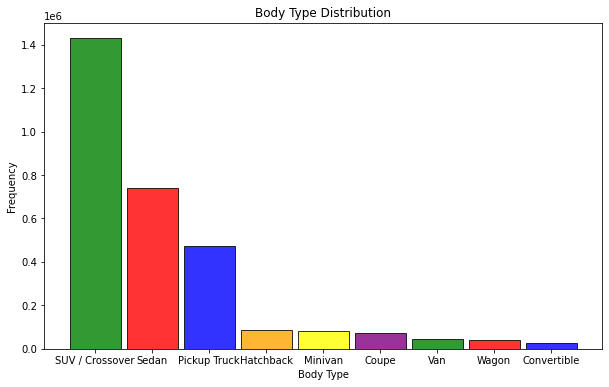

In [48]:
plt.figure(figsize=(10,6))
plt.bar(df['body_type'].value_counts().index, df['body_type'].value_counts(),
        color=['green','red','blue','orange','yellow','purple'], alpha=0.8, width=0.9, edgecolor='black')
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

## fuel_type

In [17]:
# checking how many null values are in the column
percent = df['fuel_type'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percent.round(2)}%.")

The amount of null values in the fuel_type column are 2.76%.


In [19]:
df['fuel_type'].unique()

array(['Gasoline', 'Diesel', nan, 'Biodiesel', 'Flex Fuel Vehicle',
       'Electric', 'Hybrid', 'Compressed Natural Gas', 'Propane'],
      dtype=object)

In [18]:
# checking the value counts of the column.
df['fuel_type'].value_counts()/df.shape[0]*100

Gasoline                  86.613378
Flex Fuel Vehicle          5.199697
Hybrid                     2.533700
Diesel                     1.481714
Biodiesel                  0.861822
Electric                   0.547193
Compressed Natural Gas     0.004867
Propane                    0.000200
Name: fuel_type, dtype: float64

In [21]:
df['fuel_type'].replace(np.nan, 'Gasoline', inplace=True)

In [22]:
result = df['fuel_type'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the body_type column are {result.round(2)}%.")

The amount of null values in the body_type column are 0.0%.


## horsepower

In [ ]:
percentage = df['horsepower'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

In [ ]:
df['horsepower'].value_counts()/df.shape[0]*100

In [ ]:
df['horsepower'].replace(np.nan, df['horsepower'].mean(), inplace=True)

In [ ]:
percentage = df['horsepower'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

## make_name

In [23]:
percentage = df['make_name'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 0.0%.


In [25]:
df['make_name'].unique()

array(['Jeep', 'Land Rover', 'Subaru', 'Mazda', 'Alfa Romeo', 'BMW',
       'Hyundai', 'Chevrolet', 'Lexus', 'Cadillac', 'Chrysler', 'Dodge',
       'Mercedes-Benz', 'Nissan', 'Honda', 'Kia', 'Ford', 'Lincoln',
       'Audi', 'Jaguar', 'Volkswagen', 'RAM', 'Porsche', 'Toyota',
       'INFINITI', 'GMC', 'Acura', 'Maserati', 'FIAT', 'Volvo',
       'Mitsubishi', 'Buick', 'Mercury', 'Scion', 'Saab', 'MINI',
       'Ferrari', 'Genesis', 'Saturn', 'Bentley', 'Suzuki', 'Tesla',
       'Fisker', 'Pontiac', 'Lamborghini', 'smart', 'Hummer',
       'Rolls-Royce', 'Lotus', 'Spyker', 'McLaren', 'Aston Martin',
       'Kaiser', 'Oldsmobile', 'Maybach', 'Freightliner', 'Karma',
       'Isuzu', 'Plymouth', 'Shelby', 'Triumph', 'MG', 'Pagani', 'Datsun',
       'Studebaker', 'AM General', 'Austin-Healey', 'AMC', 'Hudson',
       'Willys', 'Pininfarina', 'Sunbeam', 'Geo', 'Opel', 'SRT', 'Edsel',
       'VPG', 'Eagle', 'Bugatti', 'Daewoo', 'Hillman', 'Austin', 'Morris',
       'Packard', 'Humber', 'DeTo

In [26]:
df['make_name'].nunique()

100

in order to cut the number of unique values in the make_name column, we will list the top 20 most common values and replace the rest with the value 'Other'.

In [29]:
# checking the value counts of the column.
top_20 = df['make_name'].value_counts()/df.shape[0]*100

In [30]:
# creating a list of the top 20 makes
top_20 = top_20[:20].index
 
# creating a function to return the top 20 makes
def top_20_make(make):
    if make in top_20:
        return make
    else:
        return 'Other'
    

In [32]:
# applying the function to the column
df['make_name'] = df['make_name'].apply(top_20_make)
 
# checking the result
df['make_name'].value_counts()

Ford             476336
Chevrolet        376892
Other            247839
Toyota           239128
Nissan           217896
Honda            214459
Jeep             168434
Hyundai          136097
Kia              112330
RAM              102545
GMC               99293
Dodge             91376
Volkswagen        76092
Subaru            69729
Mercedes-Benz     66649
Buick             64786
BMW               62196
Mazda             53754
Cadillac          47166
Lexus             40646
Chrysler          36397
Name: make_name, dtype: int64

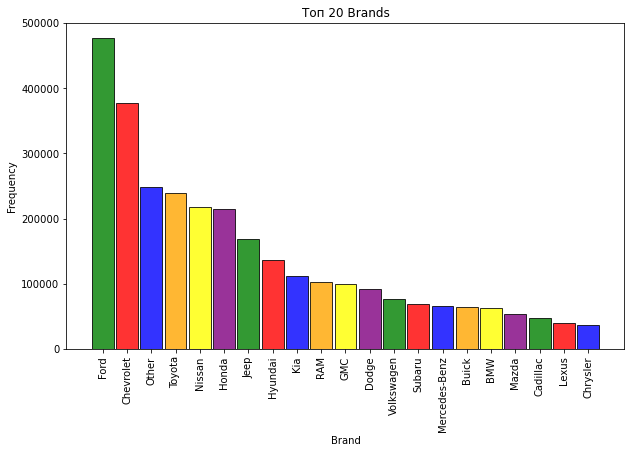

In [51]:
plt.figure(figsize=(10,6))
plt.bar(df['make_name'].value_counts().index, df['make_name'].value_counts(),
        color=['green','red','blue','orange','yellow','purple'], alpha=0.8, width=0.9, edgecolor='black')
plt.xticks(rotation=90)
plt.title('Топ 20 Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()

## maximum_seating

In [33]:
# checking how many null values are in the column
percentage = df['maximum_seating'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {percentage.round(2)}%.")

The amount of null values in the maximum_seating column are 5.31%.


In [34]:
df['maximum_seating'].value_counts()/df.shape[0]*100

5 seats     62.511067
7 seats     10.177531
6 seats     10.049366
8 seats      6.678578
4 seats      2.705764
2 seats      1.170151
3 seats      0.989187
15 seats     0.196864
9 seats      0.121132
12 seats     0.056766
10 seats     0.018000
--           0.016700
Name: maximum_seating, dtype: float64

In [35]:
df['maximum_seating'].unique()

array(['5 seats', '7 seats', '2 seats', '4 seats', '8 seats', nan,
       '6 seats', '9 seats', '3 seats', '--', '15 seats', '12 seats',
       '10 seats'], dtype=object)

The standard modern car has a maximum seating capacity of 5 people. So we can replace the null values with the value '5 seats'. But before we can do that, we will need to clean the column further.

In [36]:
# replacing the "--" with np.nan
df['maximum_seating'].replace("--", np.nan , inplace=True)

# filling the null values with a new value called the most frequent value.
df['maximum_seating'].fillna("5 seats", inplace=True)

# checking the result
result = df['maximum_seating'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {result.round(2)}%.")

The amount of null values in the maximum_seating column are 0.0%.


In [37]:
# removing the " seats" from the column
df['maximum_seating'] = df['maximum_seating'].str.replace(" seats", "")

# converting the column to a int
df['maximum_seating'] = pd.to_numeric(df['maximum_seating'], downcast='integer')

# checking the result
df['maximum_seating'].value_counts()

5     2035127
7      305330
6      301485
8      200360
4       81174
2       35105
3       29676
15       5906
9        3634
12       1703
10        540
Name: maximum_seating, dtype: int64

## transmission

In [38]:
percentage = df['transmission'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the transmission column are {percentage.round(2)}%.")

The amount of null values in the transmission column are 2.14%.


In [39]:
df['transmission'].unique()

array(['A', 'M', 'CVT', nan, 'Dual Clutch'], dtype=object)

In [40]:
df['transmission'].value_counts()

A              2418345
CVT             458016
M                48425
Dual Clutch      11069
Name: transmission, dtype: int64

In [41]:
df['transmission'].replace(np.nan, 'A', inplace=True)

In [42]:
result = df['transmission'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the transmission column are {result.round(2)}%.")

The amount of null values in the transmission column are 0.0%.


## wheel_system

In [52]:
percentage = df['wheel_system'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the wheel_system column are {percentage.round(2)}%.")

The amount of null values in the wheel_system column are 4.89%.


In [53]:
df['wheel_system'].unique()

array(['FWD', 'AWD', 'RWD', '4WD', nan, '4X2'], dtype=object)

In [54]:
df['wheel_system'].value_counts()/df.shape[0]*100

FWD    42.045006
AWD    23.190724
4WD    19.483874
RWD     6.358482
4X2     4.030913
Name: wheel_system, dtype: float64

In [55]:
df['wheel_system'].replace(np.nan, 'FWD', inplace=True)

In [56]:
result = df['wheel_system'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the wheel_system column are {result.round(2)}%.")

The amount of null values in the wheel_system column are 0.0%.


In [66]:
df

,body_type,city,dealer_zip,fuel_type,horsepower,is_new,latitude,longitude,make_name,maximum_seating,price,transmission,wheel_system,year
0,SUV / Crossover,Bayamon,00960,Gasoline,177.0,True,18.3988,-66.1582,Jeep,5,23141.0,A,FWD,2019
1,SUV / Crossover,San Juan,00922,Gasoline,246.0,True,18.4439,-66.0785,Other,7,46500.0,A,AWD,2020
2,Sedan,Guaynabo,00969,Gasoline,305.0,False,18.3467,-66.1098,Subaru,5,46995.0,M,AWD,2016
3,SUV / Crossover,San Juan,00922,Gasoline,340.0,True,18.4439,-66.0785,Other,7,67430.0,A,AWD,2020
4,SUV / Crossover,San Juan,00922,Gasoline,246.0,True,18.4439,-66.0785,Other,7,48880.0,A,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,Fairfield,94533,Gasoline,170.0,False,38.2418,-122.0830,Chevrolet,5,17998.0,A,FWD,2018
3000036,SUV / Crossover,Vallejo,94591,Gasoline,310.0,True,38.1102,-122.2030,Chevrolet,8,36490.0,A,FWD,2020
3000037,Sedan,Napa,94559,Gasoline,240.0,False,38.2873,-122.2750,Ford,5,12990.0,A,FWD,2016
3000038,Sedan,Fairfield,94533,Diesel,180.0,False,38.2418,-122.0830,Other,5,26998.0,A,AWD,2017


## city

We drop this column because we already have the dealer_zip column. The dealer_zip column is more useful because it is a numeric column and we can use it to find the state where the vehicle is located.

In [69]:
df1 = df.copy()
df1.drop(['city'], axis=1, inplace=True)
df1

,body_type,dealer_zip,fuel_type,horsepower,is_new,latitude,longitude,make_name,maximum_seating,price,transmission,wheel_system,year
0,SUV / Crossover,00960,Gasoline,177.0,True,18.3988,-66.1582,Jeep,5,23141.0,A,FWD,2019
1,SUV / Crossover,00922,Gasoline,246.0,True,18.4439,-66.0785,Other,7,46500.0,A,AWD,2020
2,Sedan,00969,Gasoline,305.0,False,18.3467,-66.1098,Subaru,5,46995.0,M,AWD,2016
3,SUV / Crossover,00922,Gasoline,340.0,True,18.4439,-66.0785,Other,7,67430.0,A,AWD,2020
4,SUV / Crossover,00922,Gasoline,246.0,True,18.4439,-66.0785,Other,7,48880.0,A,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,94533,Gasoline,170.0,False,38.2418,-122.0830,Chevrolet,5,17998.0,A,FWD,2018
3000036,SUV / Crossover,94591,Gasoline,310.0,True,38.1102,-122.2030,Chevrolet,8,36490.0,A,FWD,2020
3000037,Sedan,94559,Gasoline,240.0,False,38.2873,-122.2750,Ford,5,12990.0,A,FWD,2016
3000038,Sedan,94533,Diesel,180.0,False,38.2418,-122.0830,Other,5,26998.0,A,AWD,2017


In [70]:
df1.to_csv('one.csv', index=False)
df1

,body_type,dealer_zip,fuel_type,horsepower,is_new,latitude,longitude,make_name,maximum_seating,price,transmission,wheel_system,year
0,SUV / Crossover,00960,Gasoline,177.0,True,18.3988,-66.1582,Jeep,5,23141.0,A,FWD,2019
1,SUV / Crossover,00922,Gasoline,246.0,True,18.4439,-66.0785,Other,7,46500.0,A,AWD,2020
2,Sedan,00969,Gasoline,305.0,False,18.3467,-66.1098,Subaru,5,46995.0,M,AWD,2016
3,SUV / Crossover,00922,Gasoline,340.0,True,18.4439,-66.0785,Other,7,67430.0,A,AWD,2020
4,SUV / Crossover,00922,Gasoline,246.0,True,18.4439,-66.0785,Other,7,48880.0,A,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,94533,Gasoline,170.0,False,38.2418,-122.0830,Chevrolet,5,17998.0,A,FWD,2018
3000036,SUV / Crossover,94591,Gasoline,310.0,True,38.1102,-122.2030,Chevrolet,8,36490.0,A,FWD,2020
3000037,Sedan,94559,Gasoline,240.0,False,38.2873,-122.2750,Ford,5,12990.0,A,FWD,2016
3000038,Sedan,94533,Diesel,180.0,False,38.2418,-122.0830,Other,5,26998.0,A,AWD,2017


## dealer_zip
The dealer zip is the zip code of the dealer. A better way to represent this column is to extract the state from the zip code. This will allow us to use the state column in our model. We will drop the dealer_zip column and keep the state column instead.

In [73]:
df1['dealer_zip'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3000040 entries, 0 to 3000039
Series name: dealer_zip
Non-Null Count    Dtype 
--------------    ----- 
3000040 non-null  object
dtypes: object(1)
memory usage: 22.9+ MB


In [74]:
import zipcodes
from pprint import pprint

# creating a function to return the state of the zip code
def get_state(zip_code):
    try:
        return zipcodes.matching(zip_code)[0]['state']
    except:
        return np.nan

In [75]:
# applying the function to the column
df1['dealer_state'] = df1['dealer_zip'].apply(get_state)
 
# checking the result
df1['dealer_state'].value_counts()

TX    322158
CA    285411
FL    237476
OH    133199
IL    132370
PA    110746
NC    107181
NY    102127
GA     98434
MI     95519
VA     82375
AZ     80494
NJ     80268
IN     74693
MO     73019
TN     67907
MN     66703
MA     65934
WI     64389
CO     62838
MD     57759
OK     45316
AL     45255
SC     45059
LA     42301
KY     40012
IA     34751
CT     33071
UT     32567
NV     29046
KS     26809
AR     25311
NE     24435
NH     22335
MS     20882
ID     18110
NM     17882
WV     13759
ME     11379
SD     10522
MT     10347
ND     10177
RI      9050
WA      8744
DE      8708
VT      7833
WY      3912
OR      1332
PR       104
HI        26
AK         5
Name: dealer_state, dtype: int64

## group the states into regions 

In [77]:
# grouping the states by region
region_dict = {'CA': 'West', 'TX': 'South', 'FL': 'South', 'NY': 'Northeast',
               'PA': 'Northeast', 'IL': 'Midwest', 'OH': 'Midwest', 'GA': 'South', 'NC': 'South', 
               'MI': 'Midwest', 'NJ': 'Northeast', 'VA': 'South', 'WA': 'West', 'AZ': 'West',
               'MA': 'Northeast', 'TN': 'South', 'IN': 'Midwest', 'MO': 'Midwest', 'MD': 'South', 
               'CO': 'West', 'MN': 'Midwest', 'SC': 'South', 'AL': 'South', 'LA': 'South', 'WI': 'Midwest',
               'OR': 'West', 'KY': 'South', 'OK': 'South', 'CT': 'Northeast', 'IA': 'Midwest', 'NV': 'West',
               'UT': 'West', 'AR': 'South', 'MS': 'South', 'KS': 'Midwest', 'NM': 'West', 'NE': 'Midwest',
               'NH': 'Northeast', 'ID': 'West', 'ME': 'Northeast', 'RI': 'Northeast', 'WV': 'South', 'MT': 'West',
               'DE': 'South', 'AK': 'West', 'DC': 'South', 'ND': 'Midwest', 'SD': 'Midwest', 'VT': 'Northeast',
               'WY': 'West', 'HI': 'West', 'PR': 'South', 'GU': 'West', 'VI': 'South', 'MP': 'West', 'AS': 'South',
               'FM': 'West', 'MH': 'West', 'PW': 'West', 'AA': 'South', 'AE': 'South', 'AP': 'South'}

# mapping the dictionary to the column
df1['dealer_region'] = df1['dealer_state'].map(region_dict) 
 
# checking the result
df1['dealer_region'].value_counts()

South        1259997
Midwest       746586
West          550714
Northeast     442743
Name: dealer_region, dtype: int64

## drop dealer_state, latitude, longitude and dealer_zip columns

In [79]:
# dropping the columns
df1.drop(['dealer_zip', 'dealer_state', 'latitude', 'longitude'], axis=1, inplace=True)

In [81]:
df1

,body_type,fuel_type,horsepower,is_new,make_name,maximum_seating,price,transmission,wheel_system,year,dealer_region
0,SUV / Crossover,Gasoline,177.0,True,Jeep,5,23141.0,A,FWD,2019,South
1,SUV / Crossover,Gasoline,246.0,True,Other,7,46500.0,A,AWD,2020,South
2,Sedan,Gasoline,305.0,False,Subaru,5,46995.0,M,AWD,2016,South
3,SUV / Crossover,Gasoline,340.0,True,Other,7,67430.0,A,AWD,2020,South
4,SUV / Crossover,Gasoline,246.0,True,Other,7,48880.0,A,AWD,2020,South
...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,Gasoline,170.0,False,Chevrolet,5,17998.0,A,FWD,2018,West
3000036,SUV / Crossover,Gasoline,310.0,True,Chevrolet,8,36490.0,A,FWD,2020,West
3000037,Sedan,Gasoline,240.0,False,Ford,5,12990.0,A,FWD,2016,West
3000038,Sedan,Diesel,180.0,False,Other,5,26998.0,A,AWD,2017,West


In [83]:
df1.to_csv('two.csv', index=False)

## is new column 

In [82]:
df1['is_new'].value_counts()

False    1529003
True     1471037
Name: is_new, dtype: int64

In [89]:
# change the values to 0 and 1
df1['is_new'] = df1['is_new'].replace({True: 1, False: 0})

## price

In [92]:
df1['price'].describe()

count    3.000040e+06
mean     2.993337e+04
std      1.956617e+04
min      1.650000e+02
25%      1.845100e+04
50%      2.647700e+04
75%      3.822000e+04
max      3.299995e+06
Name: price, dtype: float64

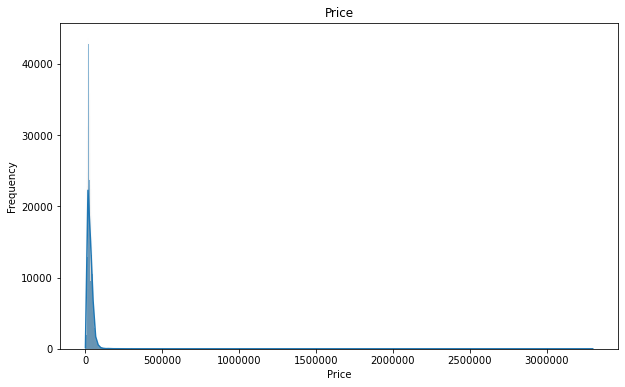

In [94]:
# plotting a histogram of the column
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], kde=True)  
plt.title('Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

The graph shows that our target variable is right skewed. This means that the majority of the values are clustered on the left side of the graph. This is not ideal for our model because it will be biased towards the lower values. We will need to transform the target variable to make it more normal.

In [96]:
# checking how many categorical columns are in the dataframe
df1.select_dtypes(include='object').nunique()

body_type         9
fuel_type         8
make_name        21
transmission      4
wheel_system      5
dealer_region     4
dtype: int64

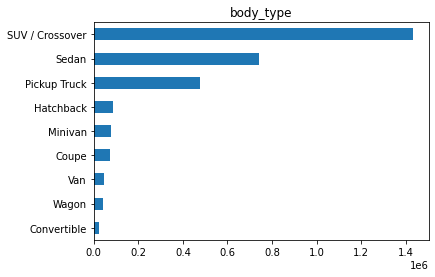

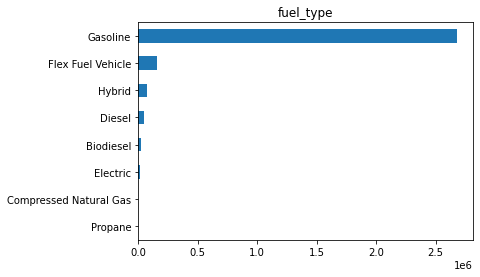

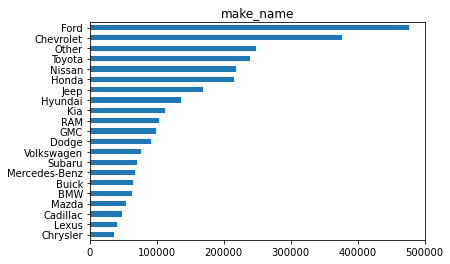

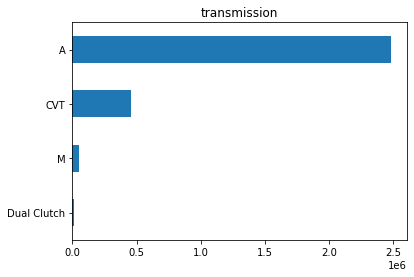

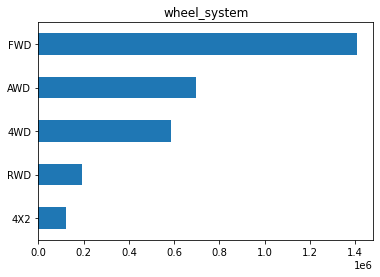

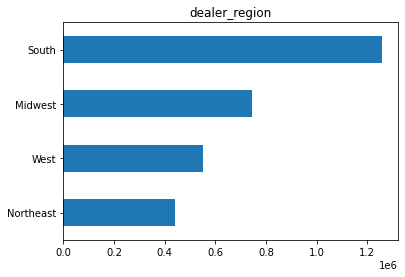

In [98]:
# Pull out the categorical variables
categorical_df = df1.select_dtypes('object')

# Iterate column by column
for column in categorical_df:
    
    # Do Something
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.title(column)
    plt.show()

Observations:

1. The top 3 body types are SUV / Crossover, Sedan, and Pickup Truck.
2. The most common type of fuel is gasoline.
3. The most common brands of cars are Ford and Chevrolet.
4. Most common transmission types are Automatic and CVT.
5. Most common wheel systems are FWD and AWD.
6. Most vehicles are located in the South region.

In [99]:
# checking how many numerical columns are in the dataframe
df1.select_dtypes(exclude='object').nunique()

horsepower           455
is_new                 2
maximum_seating       11
price              88861
year                  98
dtype: int64

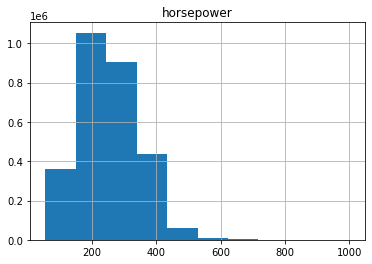

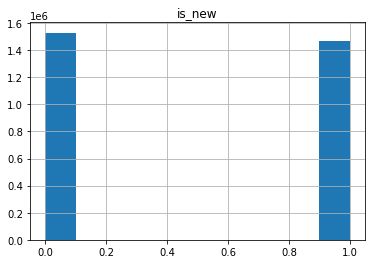

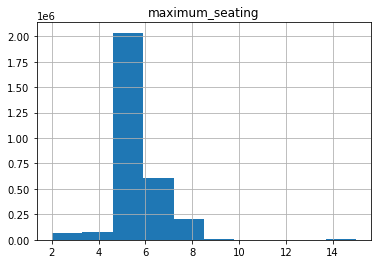

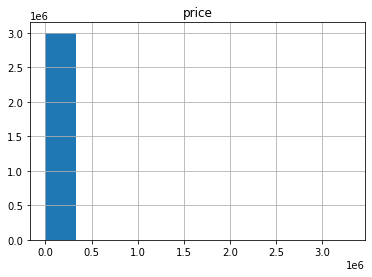

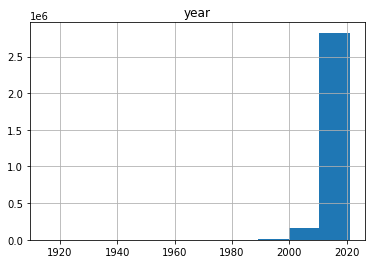

In [106]:
# Pull out the categorical variables
numerical_df = df1.select_dtypes(['float', 'int64', 'int8'])

# Iterate column by column
for column in numerical_df:
    
    # Do Something
    numerical_df[column].hist()
    plt.title(column)
    plt.show()

Observations:

1. The average speed is 248 horsepower.
2. New and used cars were sold approximately equally.
3. The average vehicle has 5 seats.
4. The average price of a vehicle is $29933.
5. The average vehicle is 2017, in this dataset.

## Saving the Cleaned Dataset

In [108]:
# saving the dataset
df1.to_csv('cleaned_df.csv', index=False)